# MULTIPLE LINEAR REGRESSION

Tasks:

1.Perform exploratory data analysis (EDA) to gain insights into the dataset. Provide visualizations and summary statistics of the variables. Pre-process the data to apply the MLR.

2.Split the dataset into training and testing sets (e.g., 80% training, 20% testing).

3.Build a multiple linear regression model using the training dataset. Interpret the coefficients of the model. Build a minimum of 3 different models.

4.Evaluate the performance of the model using appropriate evaluation metrics on the testing dataset.

5.Apply Lasso and Ridge methods on the model.

Interview Questions:
1.What is Normalization & Standardization and how is it helpful?
2.What techniques can be used to address multicollinearity in multiple linear regression?


Ensure to properly comment your code and provide explanations for your analysis.
Include any assumptions made during the analysis and discuss their implications



In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [31]:
df=pd.read_csv("/content/ToyotaCorolla - MLR.csv")

In [65]:
df.head(30)

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight,Fuel_Type_1,Fuel_Type_2
0,13500,23,46986,90,0,2000,3,4,5,1165,True,False
1,13750,23,72937,90,0,2000,3,4,5,1165,True,False
2,13950,24,41711,90,0,2000,3,4,5,1165,True,False
3,14950,26,48000,90,0,2000,3,4,5,1165,True,False
4,13750,30,38500,90,0,2000,3,4,5,1170,True,False
5,12950,32,61000,90,0,2000,3,4,5,1170,True,False
6,16900,27,94612,90,0,2000,3,4,5,1245,True,False
7,18600,30,75889,90,0,2000,3,4,5,1245,True,False
8,21500,27,19700,192,0,1800,3,4,5,1185,False,True
9,12950,23,71138,69,0,1900,3,4,5,1105,True,False


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB


In [34]:
df.isnull().sum()

,0
Price,0
Age_08_04,0
KM,0
Fuel_Type,0
HP,0
Automatic,0
cc,0
Doors,0
Cylinders,0
Gears,0


In [35]:
df.duplicated().sum()

np.int64(1)

In [36]:
df = df.drop_duplicates()

In [37]:
df.duplicated().sum()

np.int64(0)

In [38]:
df.describe()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.0,1435.000000,1435.000000
mean,10720.915679,55.980488,68571.782578,101.491986,0.055749,1576.560976,4.032753,4.0,5.026481,1072.287108
std,3608.732978,18.563312,37491.094553,14.981408,0.229517,424.387533,0.952667,0.0,0.188575,52.251882
min,4350.000000,1.000000,1.000000,69.000000,0.000000,1300.000000,2.000000,4.0,3.000000,1000.000000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,1400.000000,3.000000,4.0,5.000000,1040.000000
50%,9900.000000,61.000000,63451.000000,110.000000,0.000000,1600.000000,4.000000,4.0,5.000000,1070.000000
75%,11950.000000,70.000000,87041.500000,110.000000,0.000000,1600.000000,5.000000,4.0,5.000000,1085.000000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,16000.000000,5.000000,4.0,6.000000,1615.000000


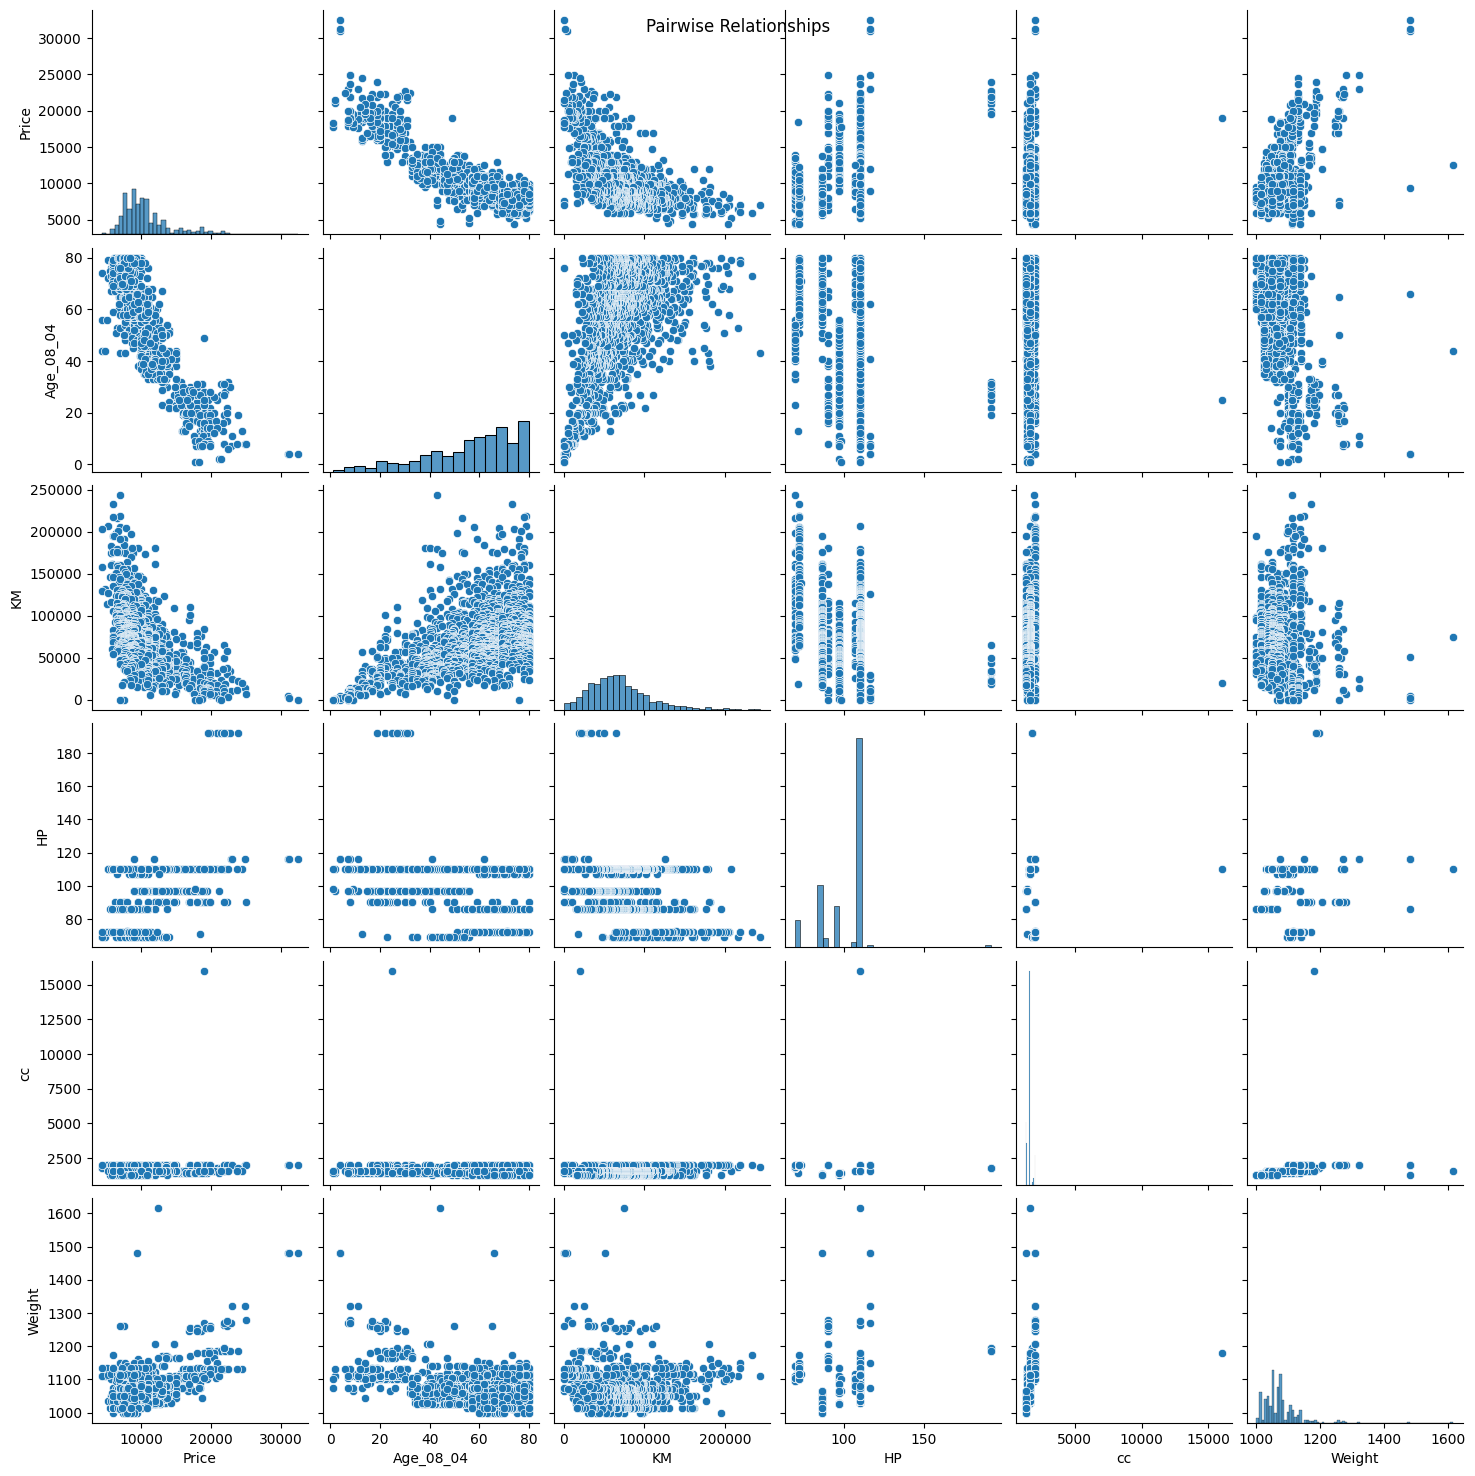

In [39]:
# Pairplot for relationships
sns.pairplot(df[['Price', 'Age_08_04', 'KM', 'HP', 'cc', 'Weight']])
plt.suptitle('Pairwise Relationships')
plt.show()

In [42]:
df_encoded = df.copy()
for col in df_encoded.select_dtypes(include=['object']).columns:
    df_encoded[col] = LabelEncoder().fit_transform(df_encoded[col])

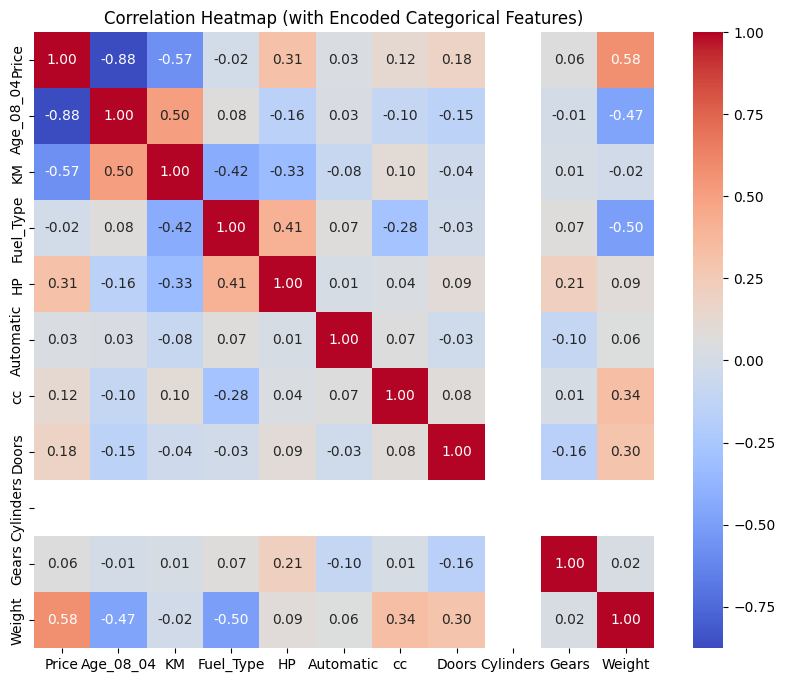

In [52]:
# Correlation heatmap
corr = df_encoded.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap (with Encoded Categorical Features)')
plt.show()

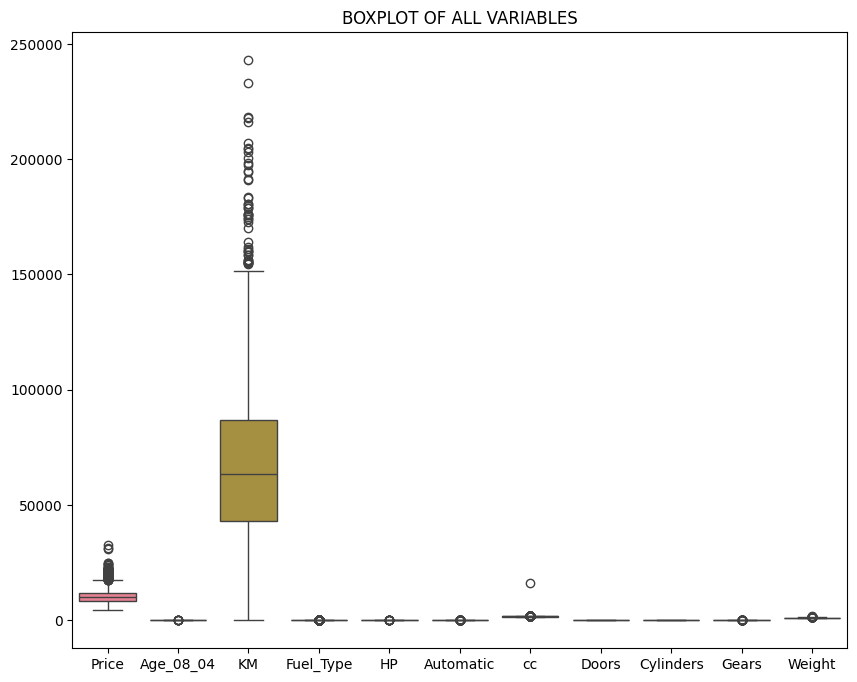

In [54]:
plt.figure(figsize=(10,8))
sns.boxplot(data=df_encoded)
plt.title("BOXPLOT OF ALL VARIABLES")
plt.show()

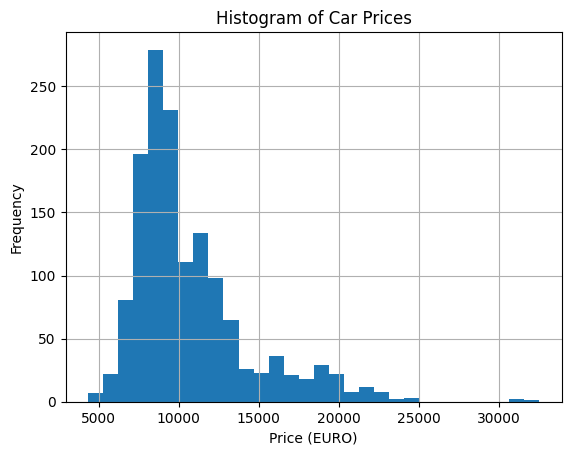

In [55]:
df_encoded['Price'].hist(bins=30)
plt.title('Histogram of Car Prices')
plt.xlabel('Price (EURO)')
plt.ylabel('Frequency')
plt.show()

In [57]:
for col in ['KM', 'HP', 'cc', 'Weight']:
    Q1 = df_encoded[col].quantile(0.25)
    Q3 = df_encoded[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df[col] = df[col].clip(lower, upper)



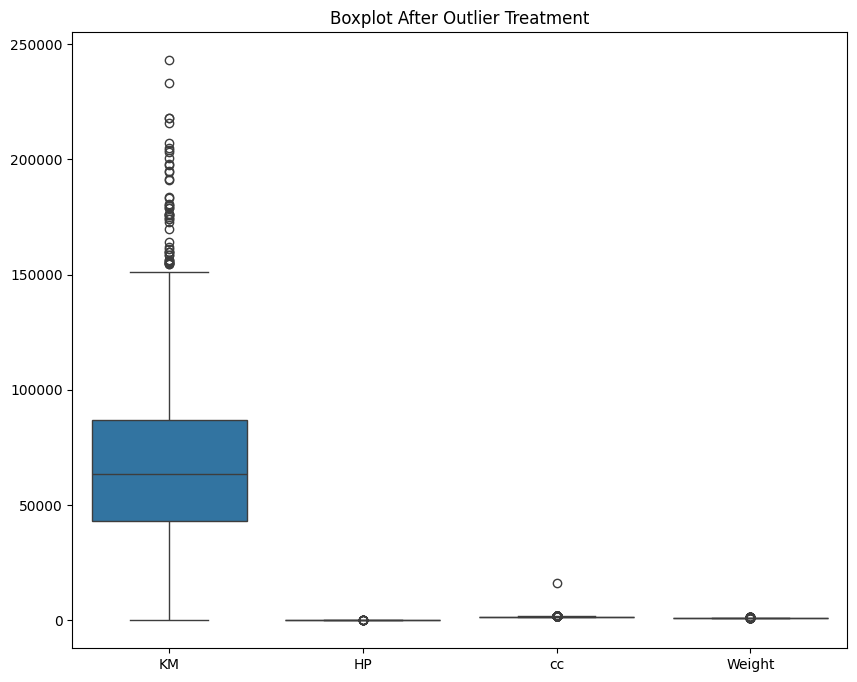

Outlier handling with IQR capping applied


In [58]:
# Visualize after outlier treatment
plt.figure(figsize=(10,8))
sns.boxplot(data=df_encoded[['KM', 'HP', 'cc', 'Weight']])
plt.title('Boxplot After Outlier Treatment')
plt.show()
print("Outlier handling with IQR capping applied")

In [62]:
print(df_encoded.columns)


Index(['Price', 'Age_08_04', 'KM', 'Fuel_Type', 'HP', 'Automatic', 'cc',
       'Doors', 'Cylinders', 'Gears', 'Weight'],
      dtype='object')


In [66]:
# One-hot encode the 'Fuel_Type' column
df = pd.get_dummies(df_encoded, columns=['Fuel_Type'], drop_first=True)

# Define your features (update fuel column names accordingly)
features = ['Age_08_04', 'KM', 'HP', 'Automatic', 'cc', 'Doors', 'Weight',
            'Fuel_Type_1', 'Fuel_Type_2']

# Split data
X = df[features]
y = df['Price']


In [67]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=39)




In [70]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print(" Scaled features for Ridge/Lasso regularization")

 Scaled features for Ridge/Lasso regularization


In [73]:
# Convert all columns to float, catching errors if any can't be converted
X_train_numeric = X_train.apply(pd.to_numeric, errors='raise')


In [78]:
for col in X_train.columns:
    if X_train[col].dtype == 'bool':
        X_train[col] = X_train[col].astype(int)

In [79]:
non_numeric_cols = X_train.select_dtypes(include=['object']).columns
print("Non-numeric columns (should be none):", non_numeric_cols)

Non-numeric columns (should be none): Index([], dtype='object')


In [80]:
X_train_numeric = X_train.apply(pd.to_numeric, errors='coerce')

In [81]:
print(X_train_numeric.isnull().sum())

Age_08_04      0
KM             0
HP             0
Automatic      0
cc             0
Doors          0
Weight         0
Fuel_Type_1    0
Fuel_Type_2    0
dtype: int64


In [82]:
X_train_numeric = X_train_numeric.fillna(0)  # Or handle as needed

In [83]:
import numpy as np
print("All finite values check:", np.isfinite(X_train_numeric.to_numpy()).all())

All finite values check: True


In [84]:
print(X_train_numeric.dtypes)

Age_08_04      int64
KM             int64
HP             int64
Automatic      int64
cc             int64
Doors          int64
Weight         int64
Fuel_Type_1    int64
Fuel_Type_2    int64
dtype: object


In [85]:
def compute_vif(data):
    vif = pd.DataFrame()
    vif["feature"] = data.columns
    vif["VIF"] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]
    return vif

vif_table = compute_vif(X_train)
print("VIF Table:")
print(vif_table)

VIF Table:
       feature         VIF
0    Age_08_04   16.257431
1           KM    8.440107
2           HP   90.114445
3    Automatic    1.103615
4           cc   14.852773
5        Doors   20.848546
6       Weight  210.203686
7  Fuel_Type_1   10.843079
8  Fuel_Type_2   59.564644


In [86]:
# Drop 'HP' and 'Weight' if VIF > 10
high_vif_features = vif_table.query('VIF > 10')["feature"].tolist()
X_train_vif = X_train.drop(columns=high_vif_features)
X_test_vif = X_test.drop(columns=high_vif_features)

vif_table_post = compute_vif(X_train_vif)
print("[NEW] VIF After Dropping High VIF Features:")
print(vif_table_post)

[NEW] VIF After Dropping High VIF Features:
     feature       VIF
0         KM  1.028703
1  Automatic  1.028703


In [87]:
# Model 1: All features
lr1 = LinearRegression()
lr1.fit(X_train, y_train)
ypred1 = lr1.predict(X_test)
print("Model 1 - All Features")
print("R2 Score:", r2_score(y_test, ypred1))
print("MSE:", mean_squared_error(y_test, ypred1))
print("Coefficients:", dict(zip(X_train.columns, lr1.coef_)))



Model 1 - All Features
R2 Score: 0.8703564839941749
MSE: 1559344.829111832
Coefficients: {'Age_08_04': np.float64(-123.40991603439306), 'KM': np.float64(-0.018096331494554502), 'HP': np.float64(30.437082417310574), 'Automatic': np.float64(342.7161402502581), 'cc': np.float64(-0.04059513337480101), 'Doors': np.float64(-18.68238977566327), 'Weight': np.float64(19.013190861892703), 'Fuel_Type_1': np.float64(970.36552837402), 'Fuel_Type_2': np.float64(1216.0547663241462)}


In [89]:
lr2 = LinearRegression()
lr2.fit(X_train_vif, y_train)
ypred2 = lr2.predict(X_test_vif)
print("Model 2 - Dropped High VIF Features")
print("R2 Score:", r2_score(y_test, ypred2))
print("MSE:", mean_squared_error(y_test, ypred2))
print("Coefficients:", dict(zip(X_train_vif.columns, lr2.coef_)))

Model 2 - Dropped High VIF Features
R2 Score: 0.3103805004445793
MSE: 8294704.076354402
Coefficients: {'KM': np.float64(-0.05591198363590038), 'Automatic': np.float64(-221.9545898900113)}


In [90]:
ridge = Ridge(alpha=0.5)
ridge.fit(X_train_scaled, y_train)
ypred3 = ridge.predict(X_test_scaled)
print("Model 3 - Ridge Regression (All features, scaled)")
print("R2 Score:", r2_score(y_test, ypred3))
print("MSE:", mean_squared_error(y_test, ypred3))
print("Coefficients:", dict(zip(X_train.columns, ridge.coef_)))

Model 3 - Ridge Regression (All features, scaled)
R2 Score: 0.8703437344684695
MSE: 1559498.1796811076
Coefficients: {'Age_08_04': np.float64(-2294.6337974282796), 'KM': np.float64(-675.8426679807238), 'HP': np.float64(464.2853079285158), 'Automatic': np.float64(74.93852501356359), 'cc': np.float64(-18.713345998619776), 'Doors': np.float64(-17.640064995766853), 'Weight': np.float64(1027.5431477866214), 'Fuel_Type_1': np.float64(296.75555630824124), 'Fuel_Type_2': np.float64(392.81356380777936)}


In [91]:
lasso = Lasso(alpha=0.5)
lasso.fit(X_train_scaled, y_train)
ypred4 = lasso.predict(X_test_scaled)
print("Model 4 - Lasso Regression (All features, scaled)")
print("R2 Score:", r2_score(y_test, ypred4))
print("MSE:", mean_squared_error(y_test, ypred4))
print("Coefficients:", dict(zip(X_train.columns, lasso.coef_)))

Model 4 - Lasso Regression (All features, scaled)
R2 Score: 0.8703912127877322
MSE: 1558927.1131602498
Coefficients: {'Age_08_04': np.float64(-2295.4855618216807), 'KM': np.float64(-675.319373777162), 'HP': np.float64(462.8067233913515), 'Automatic': np.float64(74.29195847241272), 'cc': np.float64(-17.815519483771453), 'Doors': np.float64(-17.299595404385776), 'Weight': np.float64(1027.8680522017164), 'Fuel_Type_1': np.float64(290.0569352881144), 'Fuel_Type_2': np.float64(387.71998521760827)}



Assumptions:
- Linearity between predictors and price.
- Independence (after high VIF features are dropped).
- Outliers capped for stable prediction.
Violations may affect trustworthiness of the results.


#Q1. What is Normalization & Standardization and how is it helpful?
Normalization (scaling between 0 and 1) and standardization (zero mean/unit variance) are crucial for ML algorithms, especially regularization (Ridge/Lasso), to ensure all features contribute fairly and models converge correctly.

#Q2. What techniques can be used to address multicollinearity in MLR?
Techniques include removing or combining highly correlated predictors (high VIF), using regularization (Ridge/Lasso), or dimensionality reduction (PCA). All reduce variance inflation and improve interpretability.